First, import all necessary modules: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hydron as hd

Next, define number of gridpoints, time stepsize and duration of the simulation:

N = 1000       # number of gridpoints, units
dt = 1e-4    # stepsize, s
tau = 1   # total duration, s

Now define the loop geometry. For this example we consider cemi-circular loop with radius $R = 10~Mm$. The loop cross-section is set constant by default. The direction of gravity is directed opposite to z-axis (also by default).

R = 1e8       # loop radius, cm
L = np.pi*R   # loop length, cm

#idx = np.arange(0,N,dtype=np.float32)/(N-1)

#X = np.zeros((3,N), dtype = np.double)    # (N by 3) array of gridpoint coordinates, cm
#X[0] = np.cos(np.pi*idx)*R              # x-coordinates, cm
#X[2] = np.sin(np.pi*idx)*R              # y-coordinates, cm
#X[2] = idx*R

Then we set the initial values of density $n$, velocity $u$ and temperature $T$:

In [2]:
dt,tau,X,n,u,T,hrate,config = hd.Sod_tube()

Further we define the heating rate as a function of time $t$ and coordinate along the loop $s$:

def hrate(s,t):
    return 1e-3#1e-2*np.exp(-(s/L-0.5)**2/2/0.01**2)#*np.exp(-(t-300)**2/2/25**2)


In [3]:
sim = hd.Solver(dt,X,n,u,T,hrate,config)
sim.run(tau)


in progress ...
|-10%-|-20%-|-30%-|-40%-|-50%-|-60%-|-70%-|-80%-|-90%-|-100%|
|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx
done!
Elapsed time: 1.27 seconds


<hydron.hydron.Solver instance at 0x0000000006B91148>

In [4]:
print sim.time

0.1


1.25 1.42481324639


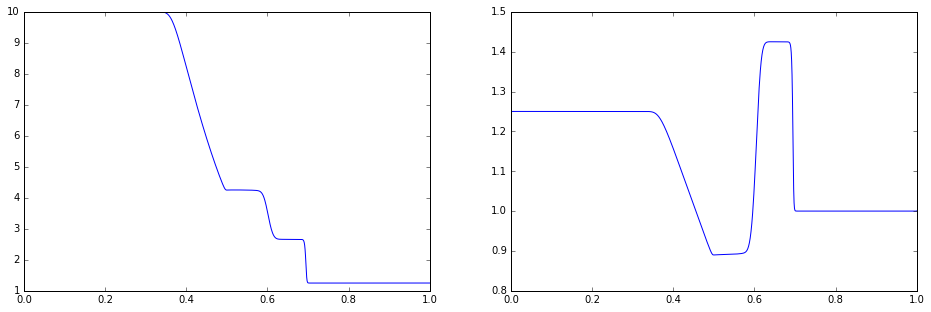

In [ ]:
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.plot(sim.s*sim.sc.x, sim.out.n[-1]*sim.sc.n)
plt.subplot(122)
plt.plot(sim.s*sim.sc.x, sim.out.T[-1]*sim.sc.T)
print np.min(sim.out.n[-1]),np.max(sim.out.T[-1])

In [ ]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Density', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(sim.out.n*sim.sc.n, vmin = 0, vmax = 10, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x,0,(sim.time)])
plt.colorbar()

plt.subplot(1,3,2)
plt.title('Temperature', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(sim.out.T*sim.sc.T, vmin = 0, vmax = 2, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x,0,(sim.time)])
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Velosity', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(sim.out.u*sim.sc.u, vmin = -1, vmax = 1,
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x,0,(sim.time)])
plt.colorbar()

In [ ]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Density, cm-3 (log scale)', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.log10(sim.out.n)+np.log10(sim.sc.n), vmin = 8.5, vmax=9.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x/1e8,0,(sim.time)])
plt.colorbar()

plt.subplot(1,3,2)
plt.title('Temperature, T (log scale)', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.log10(sim.out.T)+np.log10(sim.sc.T), vmin = 3.5, vmax=4.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x/1e8,0,(sim.time)])
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Velosity, km/s', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.array(sim.out.u)*sim.sc.u/1e5, vmin = -1, vmax = 1,
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x/1e8,0,(sim.time)])
plt.colorbar()


In [ ]:
logT = np.arange(0,100)*0.03+4
logRL = np.log10(hd.RadLoss().get(10**logT))
plt.plot(logT,logRL)

In [ ]:
import sys;lib_dir = 'Q:\\python\\lib';sys.path.append(lib_dir)
import Sun
1.16e-31/(2*Sun.k_b)**2

In [ ]:
plt.plot(sim.radloss())

In [ ]:
plt.plot(sim.u)

In [ ]:
sim.sc.u

In [ ]:
sim.mainloop.niter % sim.mainloop.each

In [ ]:
5000 % 99

In [ ]:
a = np.ones(10)
a = a.reshape((1,10))

In [ ]:
a.shape